In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import ast

In [2]:
df=pd.read_csv('./Cleaned_Dataset.csv')

In [3]:
df.head()

,Unnamed: 0,Monthly Grocery Bill,Vehicle Monthly Distance Km,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,CarbonEmission,Recycle_Glass,Recycle_Metal,...,Frequency of Traveling by Air_never,Frequency of Traveling by Air_rarely,Frequency of Traveling by Air_very frequently,Waste Bag Size_extra large,Waste Bag Size_large,Waste Bag Size_medium,Waste Bag Size_small,Energy efficiency_0,Energy efficiency_1,Energy efficiency_2
0,0,230,210,4,7,26,1,2238,0,1,...,0,0,0,0,1,0,0,1,0,0
1,1,114,9,3,9,38,5,1892,0,1,...,0,1,0,1,0,0,0,1,0,0
2,2,138,2472,1,14,47,6,2595,0,1,...,1,0,0,0,0,0,1,0,1,0
3,3,157,74,3,20,5,7,1074,1,1,...,0,1,0,0,0,1,0,0,1,0
4,4,266,8457,1,3,5,6,4743,0,0,...,0,0,1,0,1,0,0,0,0,1


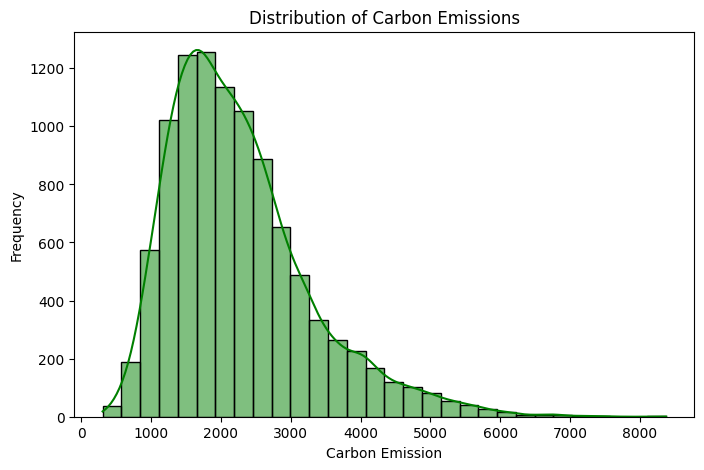

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(df['CarbonEmission'], kde=True, bins=30, color='green')
plt.title('Distribution of Carbon Emissions')
plt.xlabel('Carbon Emission')
plt.ylabel('Frequency')
plt.show()


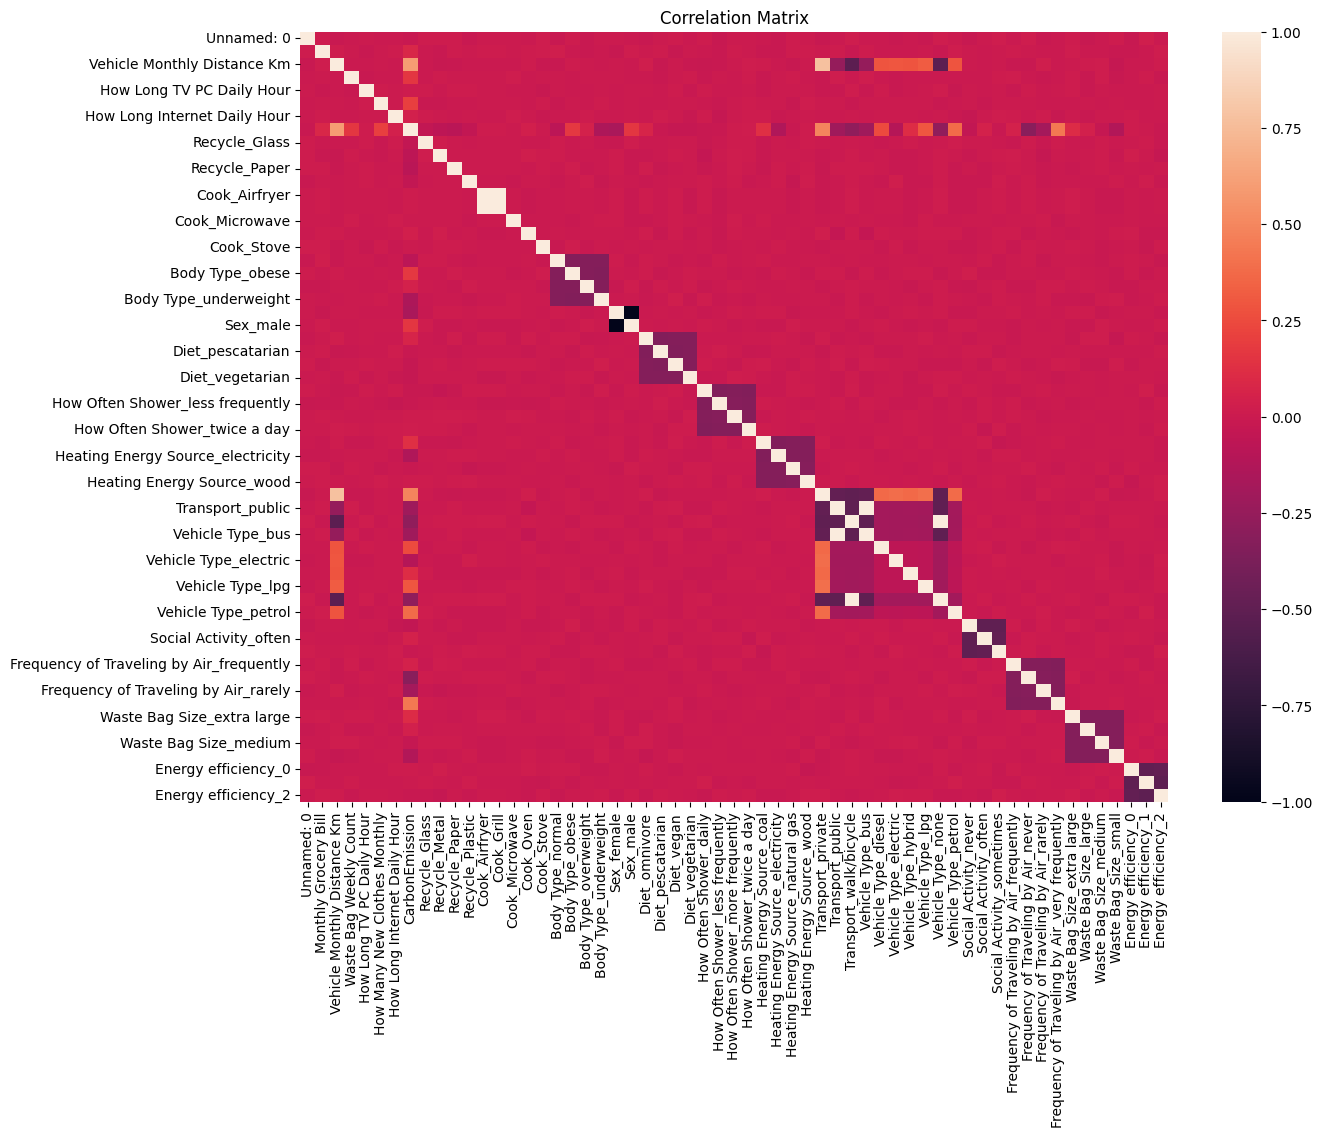

In [6]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(numeric_only=True))
plt.title('Correlation Matrix')
plt.show()


In [7]:
correlations = df.corr(numeric_only=True)['CarbonEmission'].sort_values(ascending=False)
print(correlations)


CarbonEmission                                   1.000000
Vehicle Monthly Distance Km                      0.594171
Transport_private                                0.488520
Frequency of Traveling by Air_very frequently    0.434243
Vehicle Type_petrol                              0.382708
Vehicle Type_lpg                                 0.291281
Vehicle Type_diesel                              0.243221
How Many New Clothes Monthly                     0.198887
Body Type_obese                                  0.165703
Sex_male                                         0.163895
Waste Bag Weekly Count                           0.159193
Heating Energy Source_coal                       0.128958
Vehicle Type_hybrid                              0.113084
Waste Bag Size_extra large                       0.104164
Monthly Grocery Bill                             0.081587
Diet_omnivore                                    0.069541
Social Activity_often                            0.054143
Frequency of T

<Axes: >

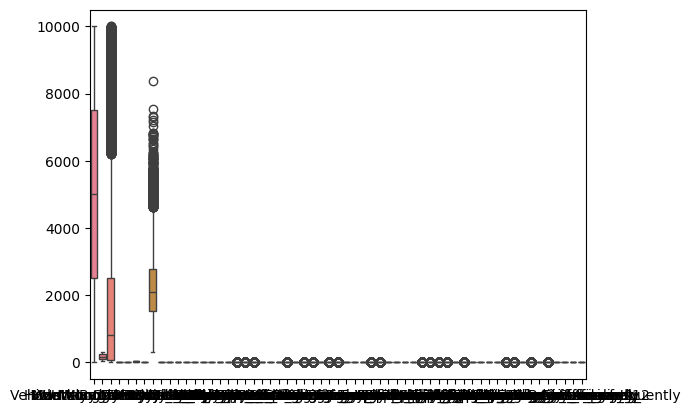

In [9]:
sns.boxplot(df)

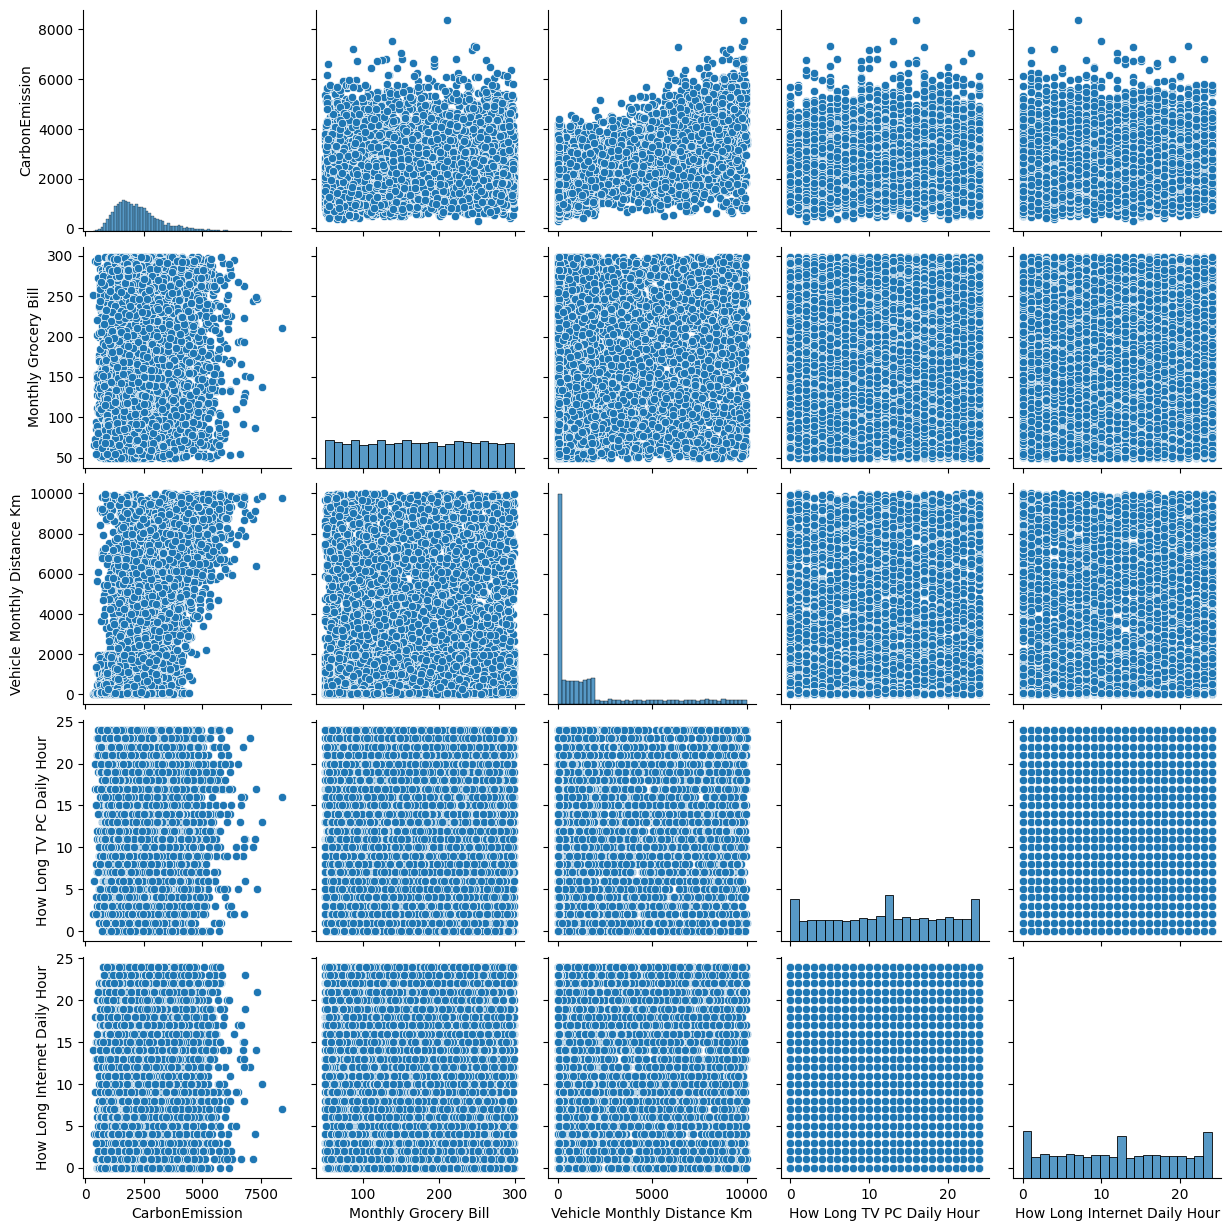

In [10]:
sns.pairplot(df[['CarbonEmission', 'Monthly Grocery Bill', 'Vehicle Monthly Distance Km',
                 'How Long TV PC Daily Hour', 'How Long Internet Daily Hour']])
plt.show()


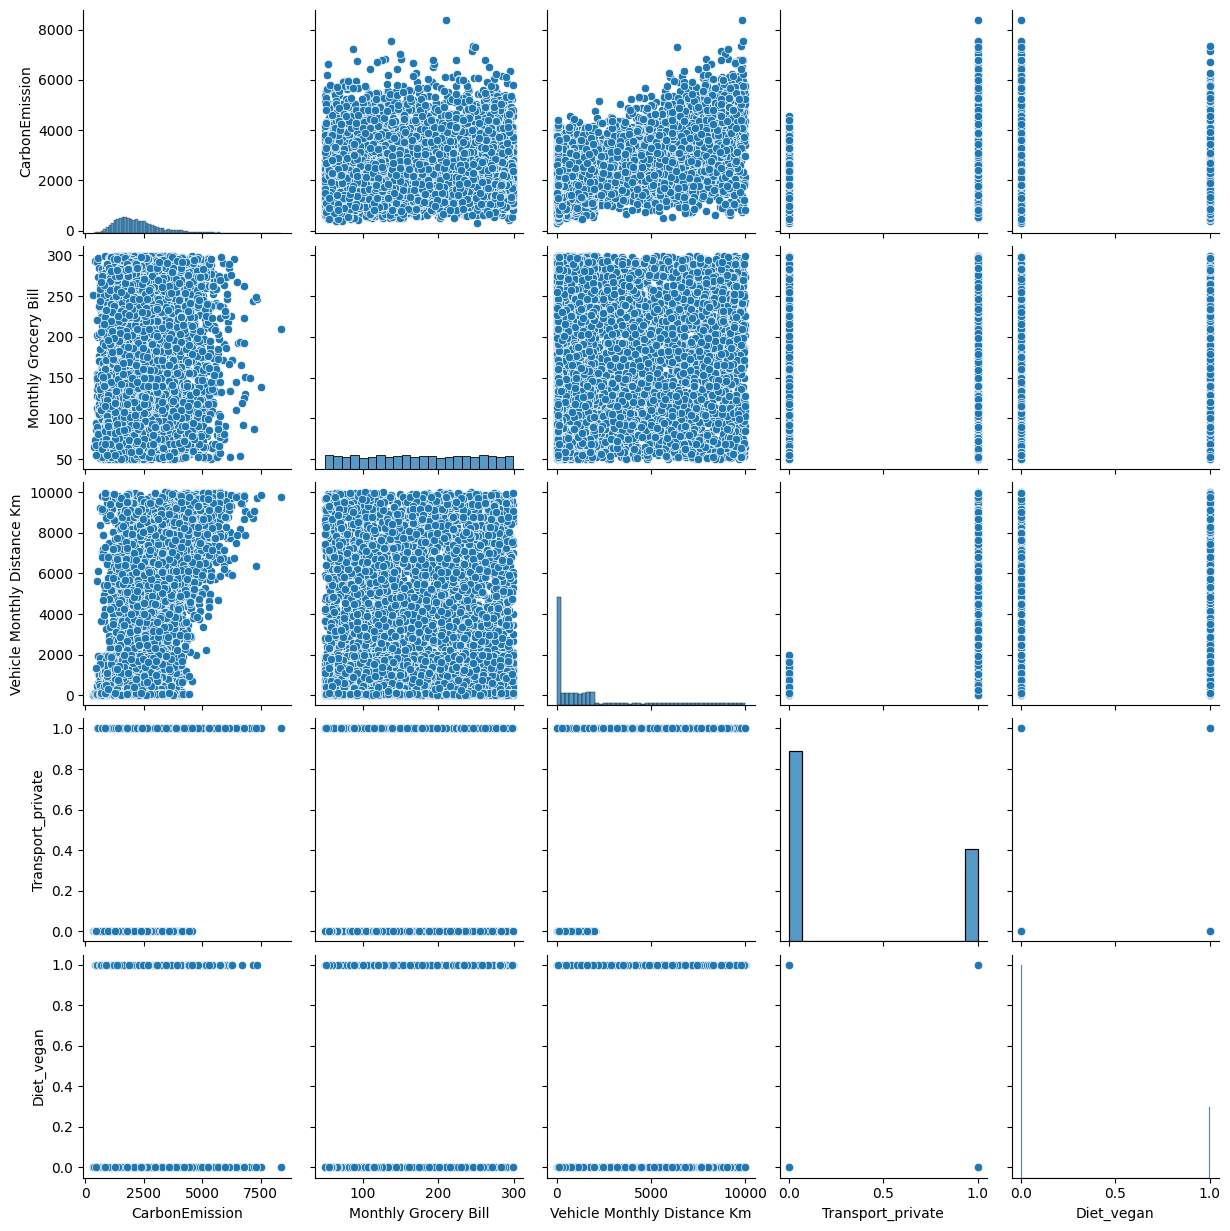

In [11]:
selected = [
    'CarbonEmission',
    'Monthly Grocery Bill',
    'Vehicle Monthly Distance Km',
    'Transport_private',
    'Diet_vegan'
]

sns.pairplot(df[selected])
